<a href="https://colab.research.google.com/github/minhhieu9800/mse_divp/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ tên: Nguyễn Minh Hiếu </br>
Mã học viên: 22MSE23062 </br>
Email: hieu22mse23062@fsb.edu.vn

# Bài 1

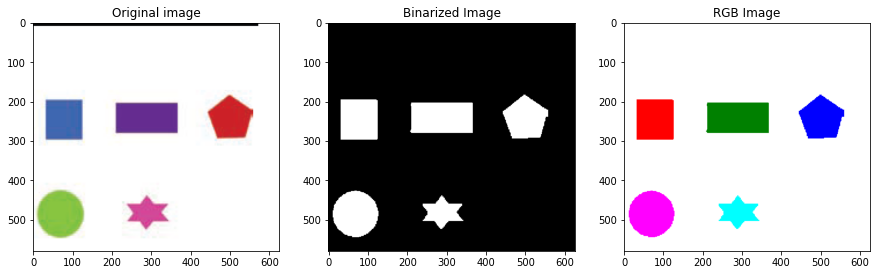

In [48]:
import cv2
import numpy as np
import urllib.request
from skimage.color import label2rgb
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

url = 'https://minhhieu9800.github.io/mse_divp/shapes.png'

# read image
with urllib.request.urlopen(url) as url_response:
    img_array = np.asarray(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Load image
# img = cv2.imread('/content/shapes.png')

# Convert to grayscale image
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayImg[0:20,:] = 255

# Binarize image
level, bwImg = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
bwImg = 255 - bwImg

# Convert colors
L = label(bwImg, connectivity=2)
cmap = ['blue','red','green','magenta','cyan']
#[magenta red green cyan blue]
rgbLabel = label2rgb(L, colors=cmap, bg_color=[1, 1, 1], bg_label=0)


# Show images

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original image')
ax[1].imshow(bwImg, cmap='gray')
ax[1].set_title('Binarized Image')
ax[2].imshow(rgbLabel)
ax[2].set_title('RGB Image')
plt.show()


# Bài 2

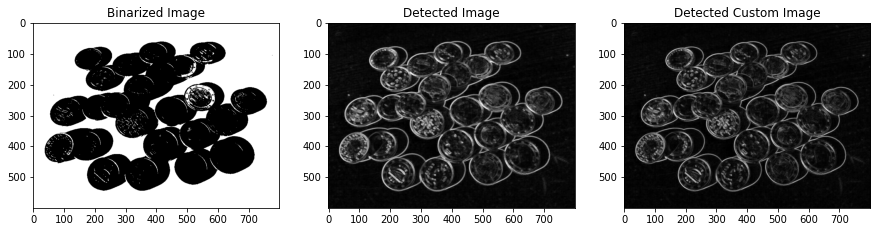

In [50]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# load image
# img = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

url = 'https://minhhieu9800.github.io/mse_divp/coins.png'

# read image
with urllib.request.urlopen(url) as url_response:
    img_array = np.asarray(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

# a. binarize image
level, bwImg = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# b. choose any structuring element
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_dilated = cv2.dilate(img, se)
img_eroded = cv2.erode(img, se)
edge1 = img_dilated - img
edge2 = img - img_eroded
edge3 = edge1 + edge2

edgeEllipse = edge3

# c. create your own structuring element
se1 = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]], dtype=np.uint8)
img_dilated = cv2.dilate(img, se1)
img_eroded = cv2.erode(img, se1)
edge1 = img_dilated - img
edge2 = img - img_eroded
edge3 = edge1 + edge2

edgeCustom = edge3


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(bwImg, cmap='gray')
ax[0].set_title('Binarized Image')
ax[1].imshow(edgeEllipse, cmap='gray')
ax[1].set_title('Detected Image')
ax[2].imshow(edgeCustom, cmap='gray')
ax[2].set_title('Detected Custom Image')
plt.show()